<style  type="text/css"> 
cool {
  width: 100px;
  height: 100px;
  background-color: red;
  position: relative;
  -webkit-animation-name: example; /* Safari 4.0 - 8.0 */
  -webkit-animation-duration: 4s; /* Safari 4.0 - 8.0 */
  -webkit-animation-iteration-count: infinite; /* Safari 4.0 - 8.0 */
  animation-name: example;
  animation-duration: 4s;
  animation-iteration-count: infinite;
}

/* Safari 4.0 - 8.0 */
@-webkit-keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}

/* Standard syntax */
@keyframes example {
  0%   {background-color:red; left:0px; top:0px;}
  25%  {background-color:yellow; left:200px; top:0px;}
  50%  {background-color:blue; left:200px; top:200px;}
  75%  {background-color:green; left:0px; top:200px;}
  100% {background-color:red; left:0px; top:0px;}
}
</style>

<b><center>
<span style="font-size: 24pt; line-height: 1.2">
STAT GU4243: Applied Data Science<br>
Fall 2023, 
</span>
</center></b>
<br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
Project 1: Data Story on Happy Moments<br>
</span>
</center></i>

# **Data Cleaning**

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter

In [5]:
# Step 0 - Load all the required libraries
import nltk
nltk.download('punkt')

# Step 1 - Load the data to be cleaned and processed
urlfile = 'https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/cleaned_hm.csv'
hm_data = pd.read_csv(urlfile)

# Step 2 - Preliminary cleaning of text
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in ('!', '.', ':', ',', '?', '(', ')', '-', '_')])
    text = ' '.join([word for word in text.split() if word.isalpha()])
    return text

hm_data['cleaned_hm'] = hm_data['cleaned_hm'].apply(clean_text)

# Step 3 - Stemming words and creating a dictionary for stem completion
ps = PorterStemmer()

def stem_and_create_dict(text):
    tokens = word_tokenize(text)
    stems = [ps.stem(word) for word in tokens]
    return ' '.join(stems), dict(Counter(tokens))

hm_data['stems'], hm_data['stem_dict'] = zip(*hm_data['cleaned_hm'].apply(stem_and_create_dict))

# Step 4 - Creating a frequency dictionary to be used for stem completion
frequency_dict = Counter()
for stem_dict in hm_data['stem_dict']:
    frequency_dict.update(stem_dict)

# Step 5 - Removing stopwords that don't hold any significant information for our data set
custom_stop_words = ["happy", "ago", "yesterday", "lot", "today", "months", "month", "happier", "happiest", "last", "week", "past"]
all_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words)

# Step 6 - Combining stems and dictionary into a dataframe
def stem_completion(stem_text, stem_dict):
    completed_text = []
    for stem in stem_text.split():
        if stem not in all_stop_words:
            completed_text.append(str(stem_dict.get(stem, stem)))
        else:
            completed_text.append(stem)
    return ' '.join(completed_text)

hm_data['completed_text'] = hm_data.apply(lambda row: stem_completion(row['stems'], row['stem_dict']), axis=1)


# Exporting the processed text data into a CSV file
hm_data.to_csv("../output/processed_moments.csv", index=False)


[nltk_data] Downloading package punkt to /Users/mansi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
cleaned_df = pd.read_csv("../output/processed_moments.csv")
cleaned_df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,stems,stem_dict,completed_text
0,27673,2053,24h,I went on a successful date with someone I fel...,i went on a successful date with someone i fel...,True,1,NaN,affection,i went on a success date with someon i felt sy...,"{'i': 2, 'went': 1, 'on': 1, 'a': 1, 'successf...",i 1 on a success 1 with someon i 1 sympathi an...
1,27674,2,24h,I was happy when my son got 90% marks in his e...,i was happy when my son got marks in his exami...,True,1,NaN,affection,i wa happi when my son got mark in hi examin,"{'i': 1, 'was': 1, 'happy': 1, 'when': 1, 'my'...",i wa happi when my 1 1 mark in hi examin
2,27675,1936,24h,I went to the gym this morning and did yoga.,i went to the gym this morning and did yoga,True,1,NaN,exercise,i went to the gym thi morn and did yoga,"{'i': 1, 'went': 1, 'to': 1, 'the': 1, 'gym': ...",i 1 to the 1 thi morn and 1 1
3,27676,206,24h,We had a serious talk with some friends of our...,we had a serious talk with some friends of our...,True,2,bonding,bonding,we had a seriou talk with some friend of our w...,"{'we': 2, 'had': 2, 'a': 2, 'serious': 1, 'tal...",we had a seriou 1 with some friend of our who ...
4,27677,6227,24h,I went with grandchildren to butterfly display...,i went with grandchildren to butterfly display...,True,1,NaN,affection,i went with grandchildren to butterfli display...,"{'i': 1, 'went': 1, 'with': 1, 'grandchildren'...",i 1 with 1 to butterfli 1 at 1 conservatori


In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
 9   stems                  100535 non-null  object
 10  stem_dict              100535 non-null  object
 11  completed_text         100535 non-null  object
dtypes: bool(1), int64(3), object(8)
memory usage: 8.5+ MB


In [8]:
#Load the Demographics Data 

url = "https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/demographic.csv"
demographic_df = pd.read_csv(url)
demographic_df.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [9]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   wid         10844 non-null  int64 
 1   age         10809 non-null  object
 2   country     10771 non-null  object
 3   gender      10812 non-null  object
 4   marital     10787 non-null  object
 5   parenthood  10813 non-null  object
dtypes: int64(1), object(5)
memory usage: 508.4+ KB


**Merging the two datasets to perform exploratory data analysis**

In [10]:
happy_df = pd.merge(cleaned_df, demographic_df, on='wid', validate = 'm:1')
happy_df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,stems,stem_dict,completed_text,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,i went on a successful date with someone i fel...,True,1,NaN,affection,i went on a success date with someon i felt sy...,"{'i': 2, 'went': 1, 'on': 1, 'a': 1, 'successf...",i 1 on a success 1 with someon i 1 sympathi an...,35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,i played a new game that was fun and got to en...,True,1,NaN,leisure,i play a new game that wa fun and got to enjoy...,"{'i': 1, 'played': 1, 'a': 1, 'new': 1, 'game'...",i play a 1 1 that wa 1 and 1 to 1 the mechan o...,35,USA,m,single,n
2,28073,2053,24h,I listened to some music and heard an entire a...,i listened to some music and heard an entire a...,True,1,NaN,leisure,i listen to some music and heard an entir albu...,"{'i': 2, 'listened': 1, 'to': 1, 'some': 1, 'm...",i listen to some 1 and 2 an entir 1 i 2 more t...,35,USA,m,single,n
3,33522,2053,24h,Went to see a movie with my friend,went to see a movie with my friend,True,1,NaN,bonding,went to see a movi with my friend,"{'went': 1, 'to': 1, 'see': 1, 'a': 1, 'movie'...",1 to see a movi with my 1,35,USA,m,single,n
4,34522,2053,24h,"Played guitar, learning a song on it",played guitar learning a song on it,True,1,NaN,leisure,play guitar learn a song on it,"{'played': 1, 'guitar': 1, 'learning': 1, 'a':...",play 1 learn a 1 on it,35,USA,m,single,n


In [11]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100535 entries, 0 to 100534
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
 9   stems                  100535 non-null  object
 10  stem_dict              100535 non-null  object
 11  completed_text         100535 non-null  object
 12  age                    100442 non-null  object
 13  country                100332 non-null  object
 14  gender                 100456 non-null  object
 15  

In [12]:
happy_df.shape

(100535, 17)

In [13]:
missing_values = happy_df.isnull().sum()
print(missing_values)

hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_truth_category    86410
predicted_category           0
stems                        0
stem_dict                    0
completed_text               0
age                         93
country                    203
gender                      79
marital                    157
parenthood                  78
dtype: int64


#  Exploratory Data Analysis 

Perform exploratory data analysis to find trends, patterns, insights and understand the relationships between each of the attributes.

__1) Anaylysis of sentences submitted by users__

Calculation of the number of words used in the sentences 

In [17]:
import seaborn as sns


In [14]:
cleaned_df = happy_df[happy_df['cleaned_hm'].notnull()]
len_count = cleaned_df['cleaned_hm'].apply(lambda x: len(x.split()))
len_count.describe()

count    100535.000000
mean         17.947929
std          20.997203
min           1.000000
25%           9.000000
50%          13.000000
75%          20.000000
max        1164.000000
Name: cleaned_hm, dtype: float64

<Axes: xlabel='Number of Words', ylabel='Count'>

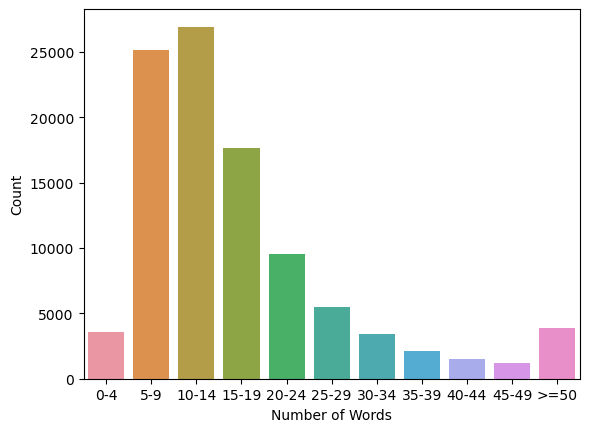

In [18]:
length_order = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", \
                "40-44", "45-49", ">=50"]
length_category = len_count.apply(lambda x: length_order[min(10, int(x/5))])
length_counts = pd.DataFrame(length_category.value_counts()).reset_index()
length_counts.columns = ['Number of Words', 'Count']

sns.barplot(x='Number of Words', y='Count', data=length_counts, order=length_order)

Majority of the responses have 5 - 24 words.

Calculation of frequency of words used  

In [19]:
cleaned_df['token_count'] = cleaned_df['cleaned_hm'].apply(lambda x: len(str(x).split()))
average_token_count = cleaned_df['token_count'].mean()
print(f"The average token count is: {average_token_count}")

The average token count is: 17.94792858208584


(-0.5, 3599.5, 2699.5, -0.5)

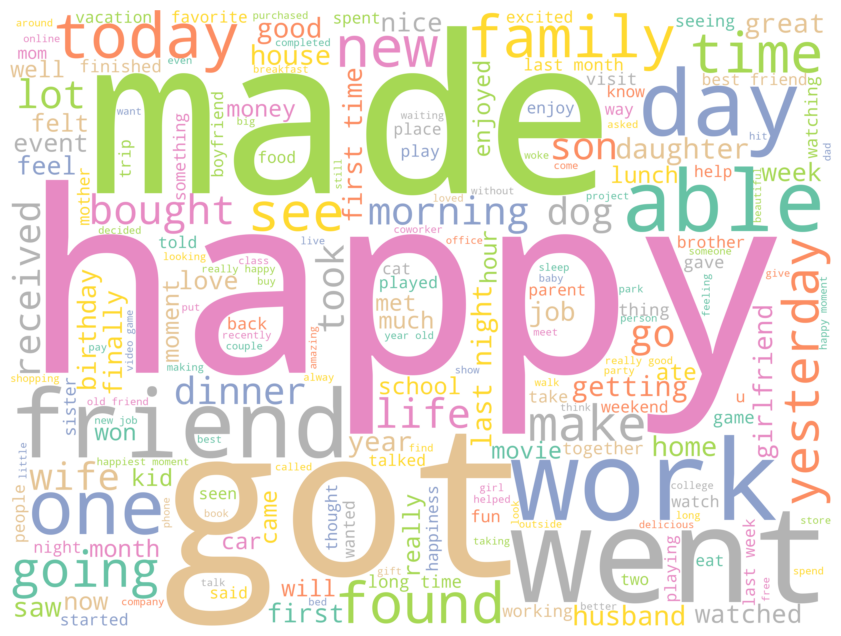

In [20]:
text = ' '.join(cleaned_df['cleaned_hm'].tolist())
text = text.lower()
wordcloud = WordCloud(background_color="white", height=2700, width=3600).generate(text)
plt.figure( figsize=(15,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

In this WordCloud, there are many noisy words such as "got", "went", "made" etc which need to be removed to get a more clear idea of what made people the most happy. 

(-0.5, 3599.5, 2699.5, -0.5)

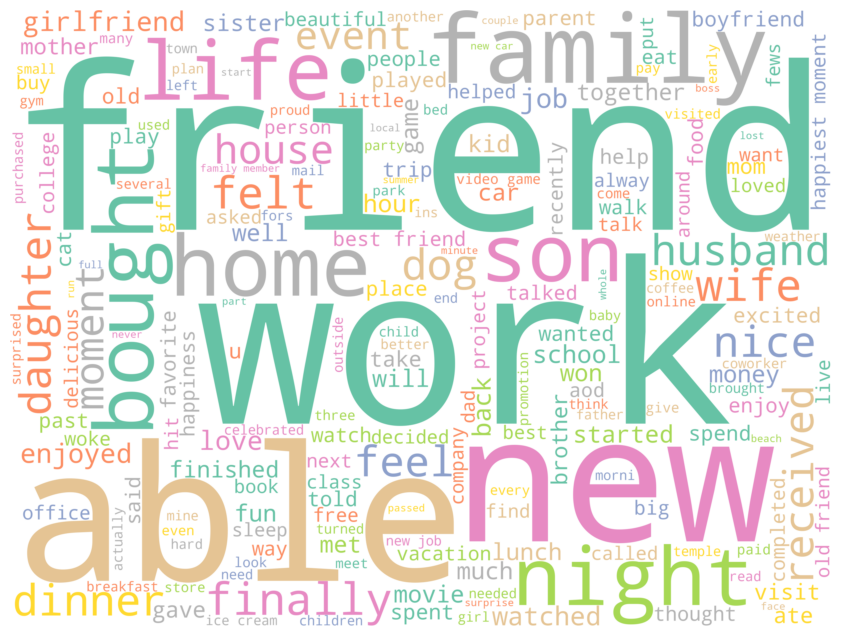

In [21]:
LIMIT_WORDS = ['happy', 'day', 'got', 'went', 'today','make', 'came','go','made', 'one', 'two', 'time', 'last', 'first', 'going', 'getting', 'took', 'found', 'lot', 'really', 'saw', 'see', 'month', 'week', 'day', 'yesterday', 'year', 'ago', 'now', 'still', 'since', 'something', 'great', 'good', 'long', 'thing', 'toi', 'without', 'yesteri', '2s', 'toand', 'ing']

text = ' '.join(cleaned_df['cleaned_hm'].tolist())
text = text.lower()
for w in LIMIT_WORDS:
    text = text.replace(' ' + w, '')
    text = text.replace(w + ' ', '')
wordcloud = WordCloud(background_color="white", height=2700, width=3600).generate(text)
plt.figure( figsize=(15,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

From this Wordcloud, we can understand that the most commonly used words in the responses were friend, work, getting something new, ability to do something. This information can be used in further anaylysis. 

__2) Calculation of Happiness Score__ 

Different scoring procedures have been added into the analytical framework in the effort to create a nuanced measure for estimating happiness scores from textual snippets.

The polarity score adds a basic element to the happiness metric by measuring the intrinsic positive or negative that is ingrained within the sentence form.

Sentiment Transition Score: This factor examines the change in sentiment between words in greater detail. This aspect is crucial for comprehending the emotional fluidity of the story and enables the model to pick up on minor changes in the changing moods, which helps to produce a more precise happiness score.


Lexical Score: This score focuses on how frequently a sentence contains specific uplifting words. It gives the model the ability to recognize the lexical richness and positive emphasis in the text, giving the happiness metric a qualitative element.

Context Score: The context score goes beyond the lexical and syntactic levels to examine the underlying sentiment in the textual context. It does this by using a deep learning model to comprehend the subtleties and complexities of human language, which makes the happiness score more in line with human interpretation.

The model attempts to compute a happiness score that is not only quantitative but also richly layered with qualitative insights, offering a comprehensive view of the perceived happiness in textual narratives, by combining these diverse scores, each with its own unique perspective and analytical depth.

In [22]:
from textblob import TextBlob
from nltk.corpus import wordnet as wn
from transformers import pipeline
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

In [ ]:
# Function to calculate sentiment transition
def sentiment_transition(sentence):
    words = sentence.split()
    transitions = []
    for i in range(len(words)-1):
        word1_polarity = TextBlob(words[i]).sentiment.polarity
        word2_polarity = TextBlob(words[i+1]).sentiment.polarity
        transitions.append(abs(word1_polarity - word2_polarity))
    if transitions:
        return sum(transitions)/len(transitions)
    else:
        return 0

# Function to calculate lexical score
def lexical_score(sentence):
    positive_lemmas = ['good', 'happy', 'positive', 'joyful', 'pleased', 'content', 'delighted', 'ecstatic', 'satisfied']
    return sum(1 for word in sentence.split() if wn.synsets(word, pos=wn.ADJ) and wn.synsets(word, pos=wn.ADJ)[0].lemmas()[0].name() in positive_lemmas)

# Function to calculate Context Score
classifier = pipeline('sentiment-analysis')

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def context_score(sentence):
    tokens = tokenizer.tokenize(sentence)
    if len(tokens) > 510:
        tokens = tokens[:510]
    sentence = tokenizer.convert_tokens_to_string(tokens)
    
    result = classifier(sentence)
    score = result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']
    return score


# Main function to calculate happiness score
def calculate_happiness_score(sentence):
    analysis = TextBlob(sentence)
    polarity = analysis.sentiment.polarity
    transition_score = sentiment_transition(sentence)
    lexical = lexical_score(sentence)
    context = context_score(sentence)

    # Adjusting the weights for each score
    weight_polarity = 0.4
    weight_transition = 0.2
    weight_lexical = 0.2
    weight_context = 0.2
    
    happiness_score = (weight_polarity * polarity + weight_transition * transition_score + weight_lexical * lexical + weight_context * context)
    return happiness_score

# Assuming cleaned_df is already defined and loaded
cleaned_df['happiness_score'] = cleaned_df['cleaned_hm'].apply(calculate_happiness_score)



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (1279 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
happiness_scores = cleaned_df['happiness_score']

plt.figure()
plt.hist(happiness_scores, bins=20, edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

The range of the overall happiness score remains between -1 and 1. This range is maintained via the aggregation scheme and weights in the calculate_happiness_score function. The meaning of each score is as follows:

A statement receives a favorable score (between 0 and 1) if it typically expresses happiness or happy feelings. A score that is more closely related to one indicates that the statement has more positivity or happiness.

Zero Score (0): A zero score denotes neutrality, which means that neither a positive nor a negative attitude is clearly conveyed by the text. Either the sentence is completely neutral or the positive and negative aspects balance one another out.

A statement that receives a negative score (between -1 and 0) is one that primarily conveys dissatisfaction or bad feelings. A result that is closer to -1 suggests that the statement contains a stronger negative emotion or unhappiness.

This total happiness score is a composite metric that incorporates the subtle impressions of lexical positivity, sentiment transition, polarity, and context to provide a thorough evaluation of the sentence's happiness quotient. It is designed to mimic how a human might understand a piece of text, collecting both overt and subtle linguistic cues.





In [ ]:
# Exporting the insightful dataframe into a CSV file
cleaned_df.to_csv("../output/final_data.csv", index=False)

__3) Analyse the different data distributions and values of select columns__

In [16]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import dash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output

/var/folders/2j/xl2qzfzd781b4n_vgf720t2h0000gn/T/ipykernel_23092/2114760660.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


**Column - predicted_category**

In [ ]:
predicted_category_counts = happy_df['predicted_category'].value_counts()

# Convert the value counts to a dataframe
predicted_category_counts_df = predicted_category_counts.reset_index()
predicted_category_counts_df.columns = ['predicted_category', 'count']
print(predicted_category_counts_df)

# Visualize the counts
plt.figure(figsize=(8,8))
plt.pie(predicted_category_counts_df['count'], labels=predicted_category_counts_df['predicted_category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Prediction Categories')
plt.show()

Most responses are in two categories namely Achievement and Affection

**Column - reflection_period**

In [ ]:
reflection_period_counts = happy_df['reflection_period'].value_counts()

# Convert the value counts to a dataframe
reflection_period_counts_df = reflection_period_counts.reset_index()
reflection_period_counts_df.columns = ['reflection_period', 'count']
print(reflection_period_counts_df)

# Visualize the counts
plt.figure(figsize=(8,8))
plt.pie(reflection_period_counts_df['count'], labels=reflection_period_counts_df['reflection_period'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Reflection Periods')
plt.show()

In [ ]:
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to calculate sentiment polarity for each happy moment
happy_df['sentiment_polarity'] = happy_df['cleaned_hm'].apply(calculate_sentiment)

# Separate data into two groups: 24-hour and 3-month reflection periods
group_24h = happy_df[happy_df['reflection_period'] == '24h']
group_3m = happy_df[happy_df['reflection_period'] == '3m']

# Calculate average sentiment polarity for each group
avg_sentiment_24h = group_24h['sentiment_polarity'].mean()
avg_sentiment_3m = group_3m['sentiment_polarity'].mean()

print(f"The average sentiment polarity for the 24-hour group is: {avg_sentiment_24h}")
print(f"The average sentiment polarity for the 3-month group is: {avg_sentiment_3m}")


According to the data, there is an equal distribution of reflections across a 3-month and a 24-hour period. The variation in sentiment polarity between the two groups is quite small which suggests that the general level of happiness expressed throughout both reflection times is fairly comparable.

In [ ]:
top_categories_24h = group_24h['predicted_category'].value_counts()
top_categories_3m = group_3m['predicted_category'].value_counts()

print(top_categories_24h)
print(top_categories_3m)

# For 24h data
wordcloud_24h = WordCloud(width = 1000, height = 500).generate_from_frequencies(top_categories_24h)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_24h, interpolation='bilinear')
plt.axis('off')
plt.title('Top Predicted Categories for 24h')
plt.show()

# For 3m data
wordcloud_3m = WordCloud(width = 1000, height = 500).generate_from_frequencies(top_categories_3m)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_3m, interpolation='bilinear')
plt.axis('off')
plt.title('Top Predicted Categories for 3m')
plt.show()


**Column - marital** 

In [ ]:
marital_counts = happy_df['marital'].value_counts()

# Convert the value counts to a dataframe
marital_counts_df = marital_counts.reset_index()
marital_counts_df.columns = ['marital', 'count']
print(marital_counts_df)

# Visualize the counts
plt.figure(figsize=(8,5))
plt.bar(marital_counts_df['marital'], marital_counts_df['count'], color='teal')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of each Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
marital_happiness = cleaned_df.groupby('marital')['happiness_score'].mean()
print(marital_happiness)



plt.figure(figsize=(10,6))
sns.boxplot(x='marital', y='happiness_score', data=cleaned_df)
plt.xlabel('Marital Status')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Scores by Marital Status')
plt.xticks(rotation=45)
plt.show()

The happiness scores do not significantly differ despite the various life conditions reflected in the marital statuses, suggesting a nuanced relationship between marital status and happiness.


**Column - Country**

In [ ]:
country_counts = happy_df['country'].value_counts()

# Convert the value counts to a dataframe
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['country', 'count']

country_counts_df = country_counts_df.sort_values('count', ascending=False)

non_zero_country_counts_df = country_counts_df[country_counts_df['count'] > 35]

fig = px.scatter(non_zero_country_counts_df, x='country', y='count', 
                   title='Distribution of Counts per Country', 
                   labels={'country': 'Countries', 'count': 'Count'})

fig.show()

**Column - parenthood**

In [ ]:
parenthood_counts = happy_df['parenthood'].value_counts()

# Convert the value counts to a dataframe
parenthood_counts_df = parenthood_counts.reset_index()
parenthood_counts_df.columns = ['parenthood', 'count']
print(parenthood_counts_df)

parenthood_happiness = cleaned_df.groupby('parenthood')['happiness_score'].mean()
print(parenthood_happiness)


**Column - age**

In [ ]:
age_happiness = cleaned_df.groupby('age')['happiness_score'].mean()

age_happiness_df = age_happiness.reset_index()
age_happiness_df.columns = ['age', 'happiness_score']
print(age_happiness_df)

import re

def clean_age(age_str):
    cleaned_str = re.sub(r'\D', '', age_str)
    return int(cleaned_str) if cleaned_str else 0

age_happiness_df['age'] = age_happiness_df['age'].apply(clean_age)

age_happiness_df['age'] = age_happiness_df['age'].astype(float)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4('Happiness Score by Age Group'),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=100, step=1,
        marks={i: str(i) for i in range(0, 101, 10)},
        value=[17, 25]
    ),
    dcc.Graph(
        id="histogram-plot",
    )
])

@app.callback(
    Output('histogram-plot', 'figure'),
    [Input('range-slider', 'value')]
)
def update_histogram(selected_range):
    age_groups = age_happiness_df[(age_happiness_df['age'] >= selected_range[0]) & (age_happiness_df['age'] <= selected_range[1])].groupby('age')['happiness_score'].mean().reset_index()
    fig = px.histogram(age_groups, x='age', y='happiness_score', 
                       title='Happiness Score by Age Group', 
                       labels={'age': 'Age Group', 'happiness_score': 'Average Happiness Score'})
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


**Column - Gender**

In [ ]:
gender_happiness = cleaned_df.groupby('gender')['happiness_score'].mean()
print(gender_happiness)



plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='happiness_score', data=cleaned_df)
plt.xlabel('Gender')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Scores based on Gender')
plt.xticks(rotation=45)
plt.show()

Correlation Between various features and Happiness score 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical variables
cleaned_df['gender_encoded'] = label_encoder.fit_transform(cleaned_df['gender'])
cleaned_df['age_encoded'] = label_encoder.fit_transform(cleaned_df['age'])
cleaned_df['parenthood_encoded'] = label_encoder.fit_transform(cleaned_df['parenthood'])
cleaned_df['marital_status_encoded'] = label_encoder.fit_transform(cleaned_df['marital'])
cleaned_df['reflection_period_encoded'] = label_encoder.fit_transform(cleaned_df['reflection_period'])
cleaned_df['country_encoded'] = label_encoder.fit_transform(cleaned_df['country'])
cleaned_df['predicted_category_encoded'] = label_encoder.fit_transform(cleaned_df['predicted_category'])

# Selecting columns to find correlation
columns_to_correlate = [
    'happiness_score', 
    'gender_encoded', 
    'age_encoded',
    'marital_status_encoded',
    'parenthood_encoded',
    'reflection_period_encoded', 
    'country_encoded',
    'predicted_category_encoded'
]

# Finding correlation
correlation_matrix = cleaned_df[columns_to_correlate].corr()


#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

Age has a negative correlation with the happiness_score meaning that the happiness score tends to drop when these factors rise or change.





